In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "data/bulldozers/"

In [4]:
!ls {PATH}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [8]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [11]:
'''
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

'''

"\nm = RandomForestRegressor(n_jobs=-1)\n# The following code is supposed to fail due to string values in the input data\nm.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)\n\n"

In [12]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [13]:
train_cats(df_raw)

In [14]:
??train_cats

In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [17]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [18]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [19]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [20]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [21]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [22]:
??proc_df

In [23]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [24]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830498091211555

In [25]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 40 s
[0.0904516351020264, 0.24711846521399766, 0.9829011197741211, 0.8909417887957723]


In [28]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)
X_train.shape, y_train.shape, X_valid.shape

((20000, 66), (20000,), (12000, 66))

In [29]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1.58 s
[0.11098679621714572, 0.35123588013235946, 0.9731326569844568, 0.7796841599331209]


In [30]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5250918574835055, 0.5794347570155595, 0.39861490875176986, 0.40040630274843714]


In [31]:
??draw_tree

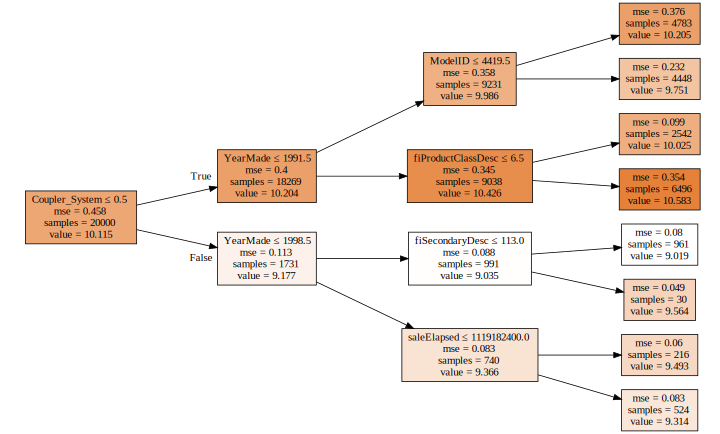

In [32]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [33]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[4.351167857633658e-17, 0.4967290685319807, 1.0, 0.5593567465141493]


In [38]:
??RandomForestRegressor

In [36]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11202469197006291, 0.3457919653234745, 0.9726278061708847, 0.7864607220304792]


In [37]:
# Bagging
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:, 0], np.mean(preds[:, 0]), y_valid[0]

(array([ 8.92266,  9.39266,  9.39266, 10.14643,  9.21034,  9.4727 ,  8.92266, 10.12663,  8.9872 ,  9.39266]),
 9.39666090494379,
 9.104979856318357)

In [43]:
preds.shape

(10, 12000)

In [46]:
preds

array([[ 8.92266,  9.61581,  9.04782, ...,  9.15905,  9.21034,  9.21034],
       [ 9.39266,  9.10498,  8.9872 , ...,  9.21034,  9.61581,  9.61581],
       [ 9.39266,  9.15905,  9.04782, ...,  9.76996,  8.9359 ,  8.9359 ],
       ...,
       [10.12663,  9.54681,  8.9872 , ..., 10.12663, 10.22194, 10.22194],
       [ 8.9872 ,  9.43348,  8.95545, ...,  9.4727 ,  9.4727 ,  9.4727 ],
       [ 9.39266,  9.54681,  9.04782, ...,  9.78414,  9.78414,  9.78414]])

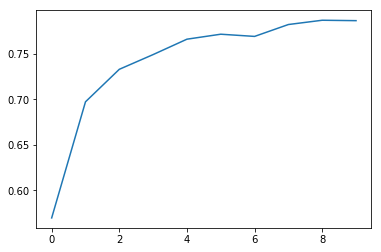

In [47]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [48]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10195336885051959, 0.33579200504207474, 0.9773282391743604, 0.7986328249852895]


In [49]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0961927842606613, 0.34543075253457406, 0.9798178662205311, 0.7869066134299658]


In [50]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09276567136282372, 0.32989822120478224, 0.9812303284135752, 0.8056395384567918]


In [51]:
# oob_score
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.10175948485178521, 0.3432948024111025, 0.9774143866370469, 0.7895337659034596, 0.8318482804797297]


In [55]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [56]:
# sub_sampling
set_rf_samples(20000)

In [54]:
??set_rf_samples

In [57]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Rajat Kumar\Anaconda3\envs\fastai-cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 7.14 s
[0.2416870719023274, 0.2796234332211041, 0.8779208023145342, 0.860364738925837, 0.8651269278300914]


In [58]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22755048591853577, 0.2626956640548525, 0.8917842781881387, 0.8767594059346462, 0.8801820591074789]


In [60]:
# reset sub_sampling
reset_rf_samples()

In [62]:
# tree building parameters
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [64]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 2min 23s
[0.07832487168851282, 0.23815220390536954, 0.9871786365831917, 0.8987121893719038, 0.9085236057834986]


In [65]:
t=m.estimators_[0].tree_

dectree_max_depth(t)

48

In [66]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14061515390800636, 0.2331904851296917, 0.9586763114977039, 0.9028887317698666, 0.9070704810389352]


In [67]:
t=m.estimators_[0].tree_

dectree_max_depth(t)

40

In [68]:
# using min_samples_leaf
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 2min 3s
[0.11497625209956952, 0.2347197369138468, 0.9723718934882833, 0.9016108534478624, 0.9085996082770528]


In [69]:
# using max_features
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 16s
[0.11909394694595053, 0.22719962170172944, 0.9703575426697186, 0.9078143798048592, 0.911714760938921]
